In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from suppressor.utils.utils import render_events, plot_arrows, plot_3Darrows, find_closest
from suppressor.RigidFlow import RigidFlow
from suppressor.Suppressor import Suppressor
from suppressor.DSECLoader import DSECLoader


# Dsec Pose compensation

In [5]:
dsec = DSECLoader(
    images_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/images", 
    events_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/events.h5", 
    K_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/cam_to_cam.yaml",
    disparity_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/disparity_events",
    disparity_ts_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/interlaken_00_c_disparity_timestamps.txt",
    T_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/poses.txt",
    poses_ts_path = "/home/rpg/Downloads/DSEC/interlaken_00_c/timestamp_poses.txt"
    )

Adding width and height to events
Casting dataset to int64
Found 537 Images


100%|██████████| 537/537 [00:15<00:00, 34.87it/s]


Found 269 Disparity Images


100%|██████████| 269/269 [00:06<00:00, 39.71it/s]


In [6]:
events = dsec.events
images = dsec.images

calibration = dsec.calibration
image_shape = dsec.image_shape

T = dsec.T
poses_ts = dsec.poses_ts

depths = dsec.depths
depths_ts = dsec.depths_ts

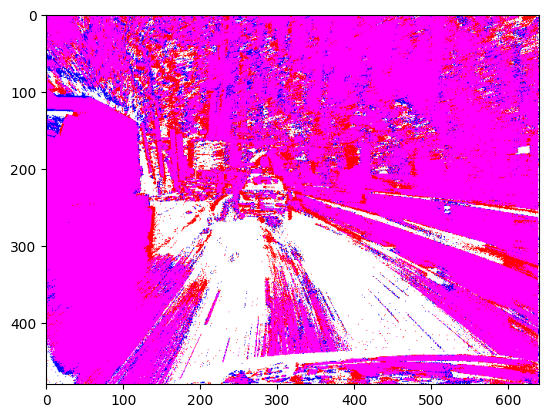

In [8]:
x,y,t,p = events
ind_0 = len(x)//2
ind_1 = ind_0 + 3000000
ev = dsec.events_from_inds(ind_0, ind_1)
rendered = render_events(ev, image_shape)
plt.imshow(rendered)

In [14]:
ts = poses_ts[1]
time_differences = np.abs(ts - t)
closest_index = np.argmin(time_differences)
closest_index